In [2]:
import os
from zipfile import ZipFile
# Attempt to unzip and list contents of the newly uploaded zip file
zip_path_new = r"C:\Users\kusum\Downloads\archive (8).zip" # Path to the new zip file
extract_to_path_new = r"C:\Users\kusum\Downloads\final dataset"  # Extraction directory

# Create a directory for the extracted files
os.makedirs(extract_to_path_new, exist_ok=True)

# Extract the zip file
with ZipFile(zip_path_new, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path_new)

# List the files in the directory
extracted_files_new = os.listdir(extract_to_path_new)
extracted_files_new


['Dataset']

In [3]:
# List contents of the "Dataset" directory
dataset_directory = os.path.join(extract_to_path_new, 'Dataset')
dataset_contents = os.listdir(dataset_directory)
dataset_contents


['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

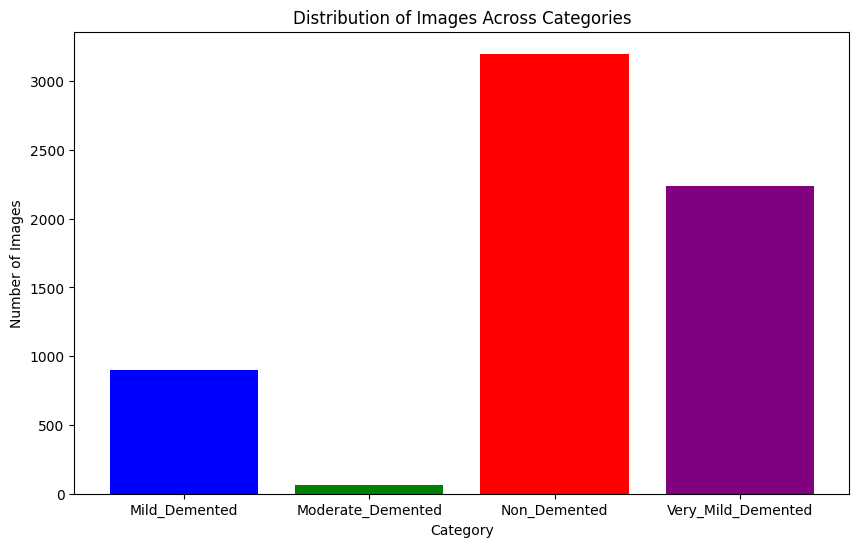

{'Mild_Demented': 896,
 'Moderate_Demented': 64,
 'Non_Demented': 3200,
 'Very_Mild_Demented': 2240}

In [4]:
import matplotlib.pyplot as plt

# Count the number of files in each category
category_counts = {category: len(os.listdir(os.path.join(dataset_directory, category)))
                   for category in dataset_contents}

# Create a bar plot to show the distribution of images across categories
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Distribution of Images Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

category_counts


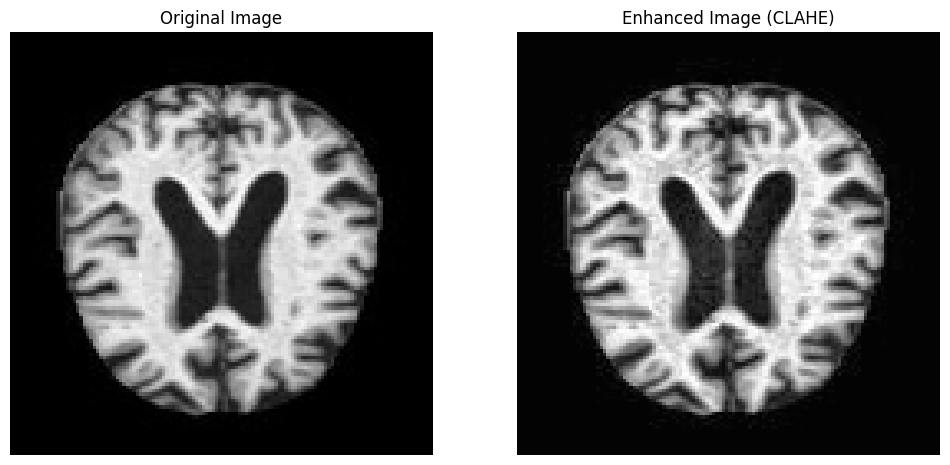

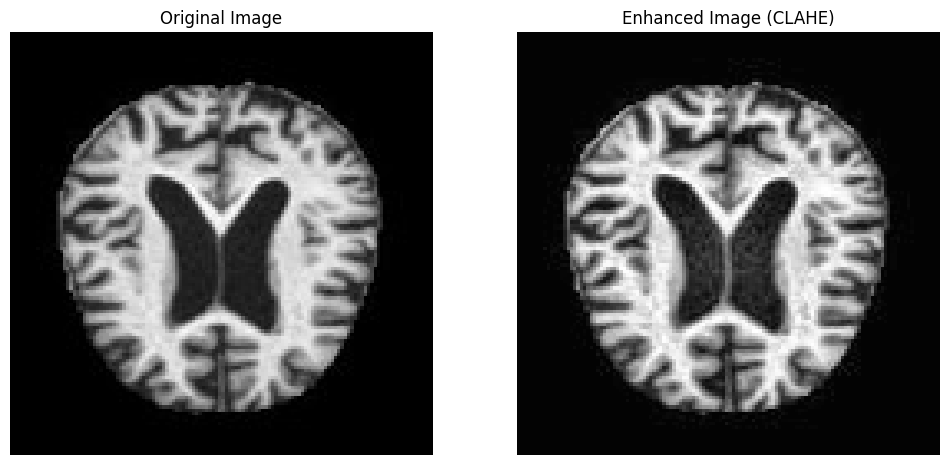

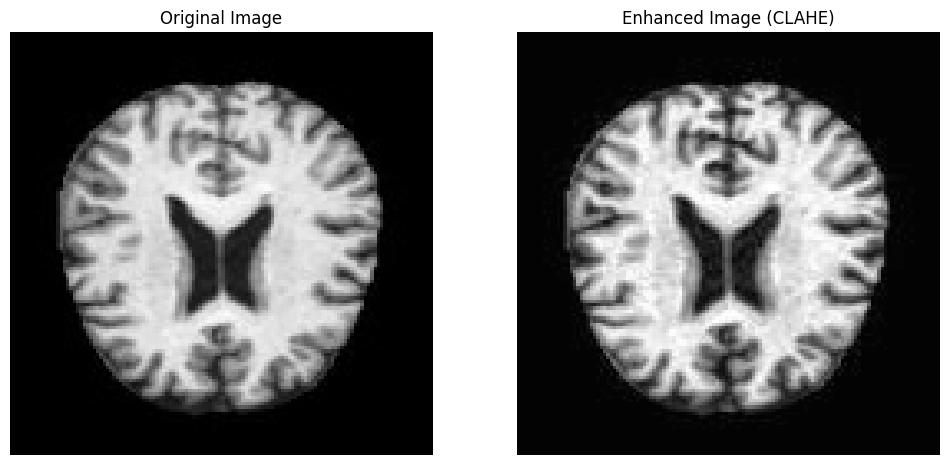

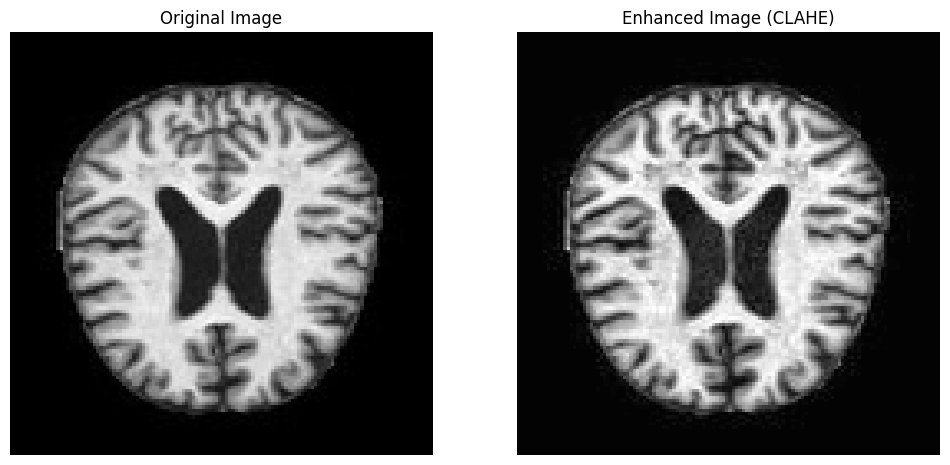

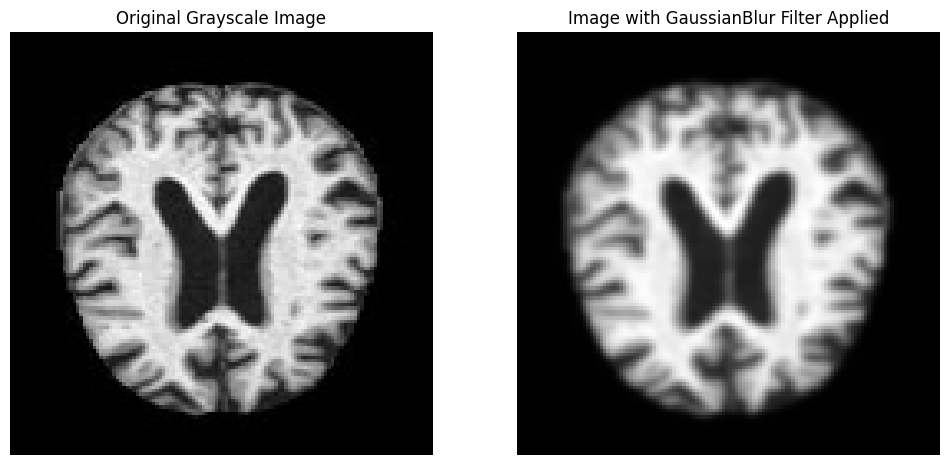

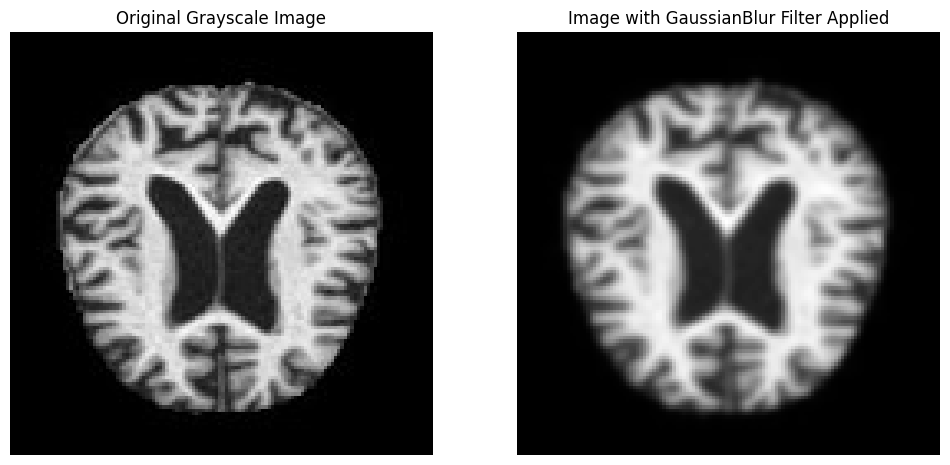

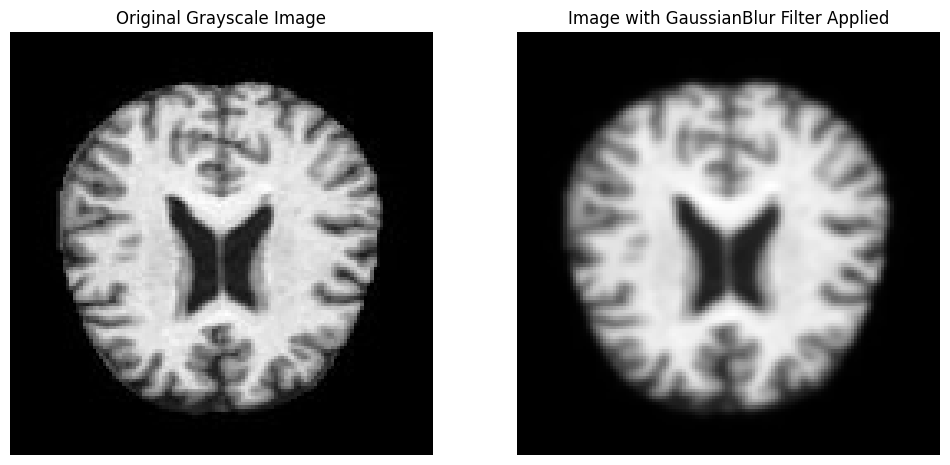

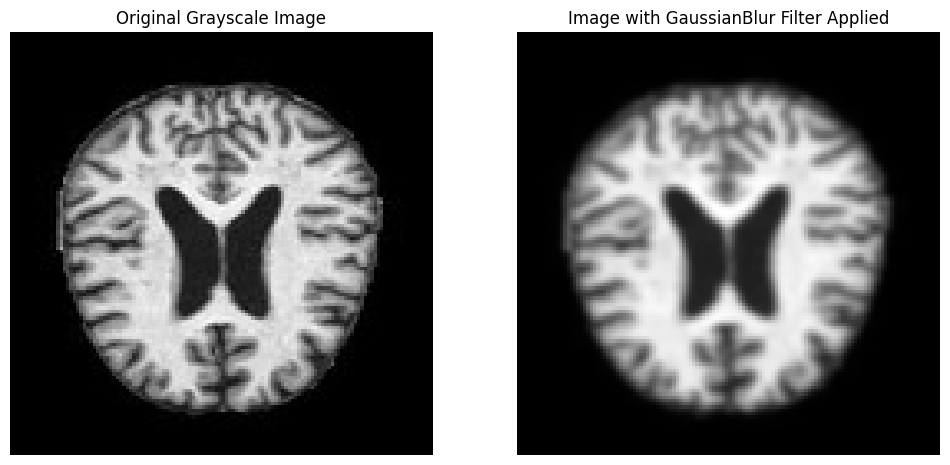

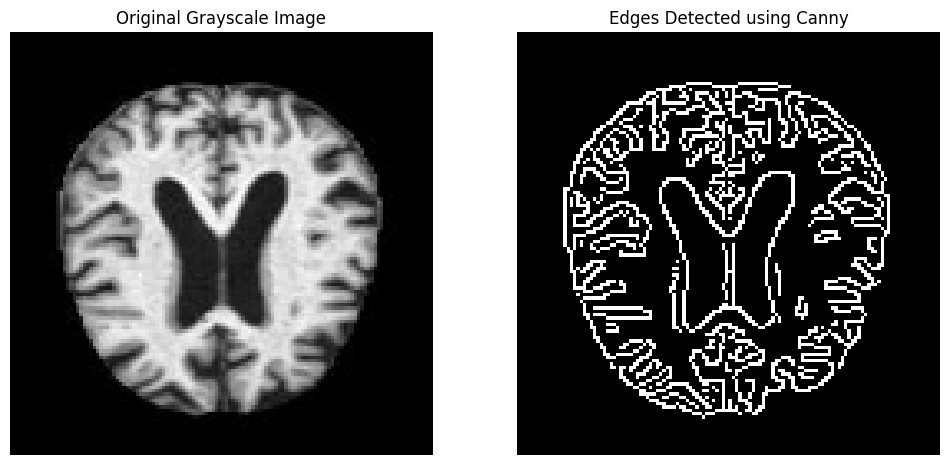

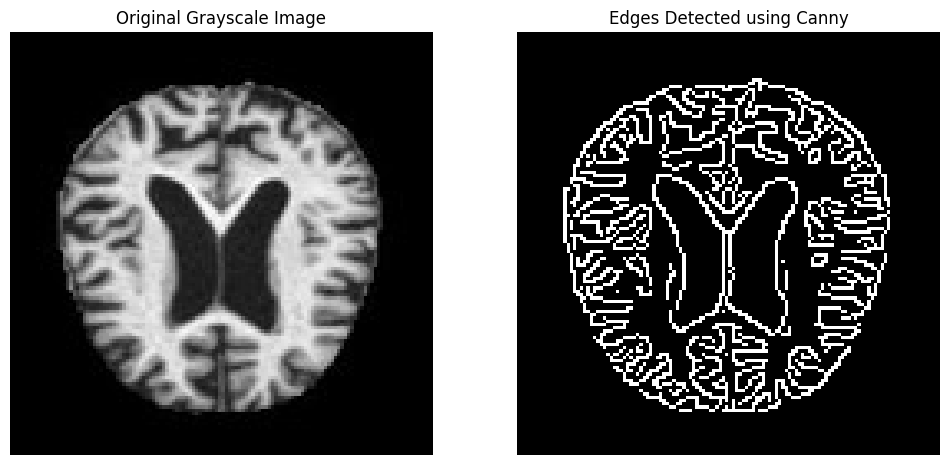

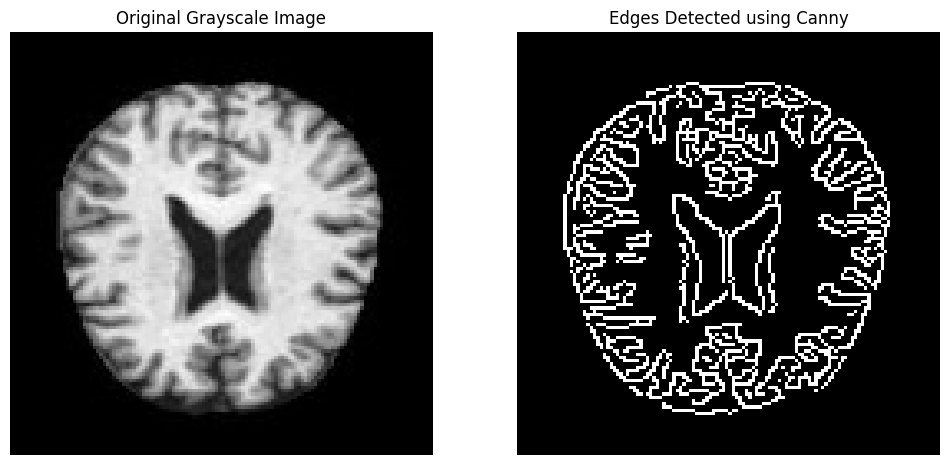

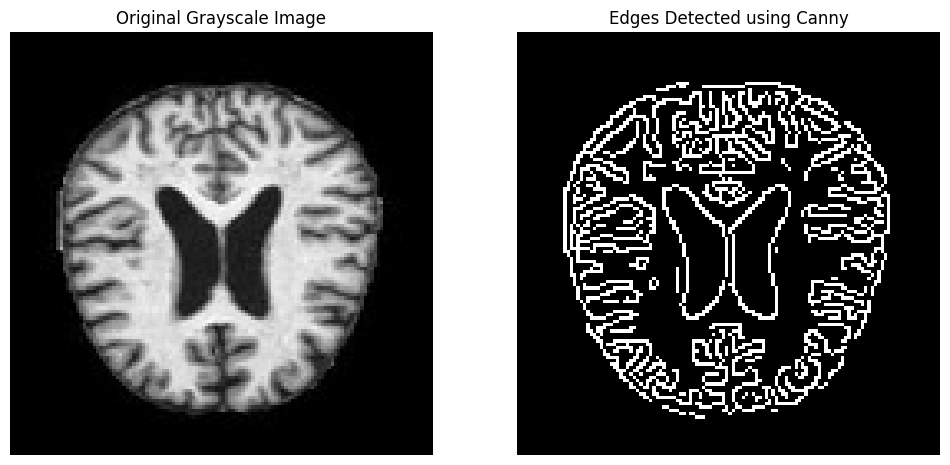

In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

AUTOTUNE = tf.data.AUTOTUNE

# Function to apply contour sharpening filter
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

# Function to apply CLAHE contrast enhancement
def enhance_contrast_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    enhanced_image = clahe.apply(image_gray)
    return cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2RGB)

# Function to apply GaussianBlur filter
def reduce_noise_gaussian_blur(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

# Function to apply Canny edge detection
def detect_edges_canny(image):
    edges = cv2.Canny(image, 100, 200)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# Define the directory containing the categories
dataset_directory = r"C:\Users\kusum\Downloads\final dataset\Dataset"  # Make sure to set this to your actual path

# Load images from a TensorFlow dataset, convert to grayscale, apply CLAHE contrast enhancement,
# and visualize both original and enhanced images
for category in os.listdir(dataset_directory):
    category_path = os.path.join(dataset_directory, category)
    image_path = os.path.join(category_path, os.listdir(category_path)[0])  # Get the path of the first image in the category
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    enhanced_image = enhance_contrast_clahe(original_image)
    axs[1].imshow(enhanced_image)
    axs[1].set_title('Enhanced Image (CLAHE)')
    axs[1].axis('off')

    plt.show()

# Apply contour sharpening filter, load an image in grayscale, apply GaussianBlur filter,
# and visualize both the original grayscale image and the image with GaussianBlur filter applied
for category in os.listdir(dataset_directory):
    category_path = os.path.join(dataset_directory, category)
    image_path = os.path.join(category_path, os.listdir(category_path)[0])  # Get the path of the first image in the category
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(grayscale_image, cmap='gray')
    axs[0].set_title('Original Grayscale Image')
    axs[0].axis('off')

    blurred_image = reduce_noise_gaussian_blur(grayscale_image)
    axs[1].imshow(blurred_image, cmap='gray')
    axs[1].set_title('Image with GaussianBlur Filter Applied')
    axs[1].axis('off')

    plt.show()

# Apply Canny edge detection, load an image in grayscale, and visualize both the original grayscale image
# and the detected edges using Matplotlib
for category in os.listdir(dataset_directory):
    category_path = os.path.join(dataset_directory, category)
    image_path = os.path.join(category_path, os.listdir(category_path)[0])  # Get the path of the first image in the category
    original_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(grayscale_image, cmap='gray')
    axs[0].set_title('Original Grayscale Image')
    axs[0].axis('off')

    edges_image = detect_edges_canny(grayscale_image)
    axs[1].imshow(edges_image, cmap='gray')
    axs[1].set_title('Edges Detected using Canny')
    axs[1].axis('off')

    plt.show()


In [6]:
# Preprocess all images in the dataset
all_processed_images = []
all_labels = []

for category in os.listdir(dataset_directory):
    category_path = os.path.join(dataset_directory, category)
    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)
        original_image = cv2.imread(image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Apply preprocessing functions
        enhanced_image = enhance_contrast_clahe(original_image)
        blurred_image = reduce_noise_gaussian_blur(original_image)
        edges_image = detect_edges_canny(original_image)

        # Append processed images and labels
        all_processed_images.append({
            'original': original_image,
            'enhanced_clahe': enhanced_image,
            'blurred': blurred_image,
            'edges_canny': edges_image
        })
        all_labels.append(category)



In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np


# Convert the list of dictionaries to numpy arrays
X = np.array([item['enhanced_clahe'] for item in all_processed_images])
y = np.array(all_labels)

# Define img_height and img_width based on the dimensions of the images
img_height, img_width, _ = X[0].shape

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = y_encoded.reshape(-1, 1)

# Apply SMOTE for balancing if necessary
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.reshape(-1, img_height * img_width * 3), y_encoded)
X_resampled = X_resampled.reshape(-1, img_height, img_width, 3)
# When reshaping your images, ensure they match the input size expected by the model
X_resampled = X_resampled.reshape(-1, img_height, img_width, 3)
# Make sure img_height and img_width are both set to 150
img_height, img_width = 150, 150


# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define the model architecture 
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming there are 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define an EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save('finalmodel.h5')


c:\Users\kusum\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4918 - loss: 1.1102 - val_accuracy: 0.7031 - val_loss: 0.6491
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7969 - loss: 0.4544 - val_accuracy: 0.8589 - val_loss: 0.3419
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9168 - loss: 0.2127 - val_accuracy: 0.8995 - val_loss: 0.2528
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9700 - loss: 0.0861 - val_accuracy: 0.9078 - val_loss: 0.2649
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9836 - loss: 0.0485 - val_accuracy: 0.9052 - val_loss: 0.3255
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9824 - loss: 0.0537 - val_accuracy: 0.9406 - val_loss: 0.2297
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9919 - loss: 0.0260 - val_accuracy: 0.9354 - val_loss: 0.2466
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9939 - loss: 0.0176 - val_accu

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  # Import the additional functions
from imblearn.over_sampling import SMOTE
import numpy as np

# Convert the list of dictionaries to numpy arrays
X = np.array([item['enhanced_clahe'] for item in all_processed_images])
y = np.array(all_labels)

# Define img_height and img_width based on the dimensions of the images
img_height, img_width, _ = X[0].shape

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = y_encoded.reshape(-1, 1)

# Apply SMOTE for balancing if necessary
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.reshape(-1, img_height * img_width * 3), y_encoded)
X_resampled = X_resampled.reshape(-1, img_height, img_width, 3)
# When reshaping your images, ensure they match the input size expected by the model
X_resampled = X_resampled.reshape(-1, img_height, img_width, 3)
# Make sure img_height and img_width are both set to 150
img_height, img_width = 150, 150


# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define the model architecture 
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming there are 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define an EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save('finalmodel.h5')

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# y_test is already a 1D array of class labels, as we are using sparse_categorical_crossentropy
y_test_classes = y_test.squeeze()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate the classification report
class_report = classification_report(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(class_report)


c:\Users\kusum\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.5551 - loss: 0.9663 - val_accuracy: 0.7583 - val_loss: 0.5215
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8401 - loss: 0.3897 - val_accuracy: 0.8641 - val_loss: 0.3382
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9432 - loss: 0.1479 - val_accuracy: 0.9146 - val_loss: 0.2230
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9799 - loss: 0.0583 - val_accuracy: 0.9260 - val_loss: 0.2336
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9882 - loss: 0.0364 - val_accuracy: 0.9151 - val_loss: 0.2769
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9847 - loss: 0.0412 - val_accuracy: 0.9354 - val_loss: 0.2180
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9965 - loss: 0.0123 - val_accuracy: 0.9250 - val_loss: 0.2629
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9973 - loss: 0.0096 - val_a


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Confusion Matrix:
[[451   3   6  40]
 [  0 484   0   0]
 [  1   0 475   4]
 [ 41   1  24 390]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       500
           1       0.99      1.00      1.00       484
           2       0.94      0.99      0.96       480
           3       0.90      0.86      0.88       456

    accuracy                           0.94      1920
   macro avg       0.94      0.94      0.94      1920
weighted avg       0.94      0.94      0.94      1920

